# < 3주차 과제 1 : MLP 마음대로 다뤄보기>
- dataset을 임의로 선정해서 직접 분석 해보기(제공한 코드를 활용해서 해보기)
- activation functions 중 relu사용시 함수 직접 정의
- lr, optimizer 등 바꿔보기
- hidden layer/neuron 수를 바꾸기
- 전처리도 추가
- 모든 시도를 올려주세요!
- 제일 높은 acc를 보인 시도를 명시해주세요!


In [1]:
import torch
from torch import nn, optim
from sklearn.datasets import load_digits
from sklearn.datasets import load_breast_cancer
from torch.utils.data import  TensorDataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from collections import Counter
from torch.utils.data import Dataset
import torch.nn.functional as F

## 아래 데이터셋 중 원하는 데이터셋 하나를 선택하여, 코드 과제 진행하기!
- 1) load_digits() <br>
- 2) load_wine()

In [2]:
# 데이터셋 종류 : 
data = load_digits()

In [3]:
input = data.data
output = data.target

In [4]:
input.shape, output.shape

((1797, 64), (1797,))

In [5]:
Counter(output)

# output 개수

Counter({0: 178,
         1: 182,
         2: 177,
         3: 183,
         4: 181,
         5: 182,
         6: 181,
         7: 179,
         8: 174,
         9: 180})

In [6]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

torch.manual_seed(777)
if device == "cuda":
  torch.cuda.manual_seed_all(777)

### ReLU 구현

In [8]:
def ReLU(x):
  return np.maximum(0, x)

### 첫번째 시도(베이스라인 코드 기반, 제일 성능 좋음)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(input, output, test_size = 0.3, random_state = 42, stratify= data.target, shuffle = True)

x_train = torch.FloatTensor(x_train).to(device)
y_train = torch.LongTensor(y_train).to(device)
x_test = torch.FloatTensor(x_test)
y_test = torch.LongTensor(y_test)

# 데이터를 tensor로 바꿔주고 gpu 연산이 가능해지도록 gpu에 옮김
# label 값을 왜 long 에 옮겨놓는가? loss function이 다르기 때문 

In [ ]:
print(len(x_train[0]))
print(x_train[0])
print(y_train[0])

#input 64개 (속성이 30개)
#1번째 target은 0

64
tensor([ 0.,  0.,  0., 16., 12.,  1.,  0.,  0.,  0.,  0.,  6., 16., 14.,  7.,
         0.,  0.,  0.,  0., 14., 15.,  1., 11.,  0.,  0.,  0.,  0., 16., 15.,
         0., 14.,  1.,  0.,  0.,  1., 16., 10.,  0., 14.,  2.,  0.,  0.,  0.,
        15., 13.,  3., 15.,  3.,  0.,  0.,  0.,  9., 16., 16., 15.,  0.,  0.,
         0.,  0.,  0., 13., 16.,  8.,  0.,  0.])
tensor(0)


파이토치에서는 데이터셋을 좀 더 쉽게 다룰 수 있도록 유용한 도구로서 torch.utils.data.Dataset과 torch.utils.data.DataLoader를 제공합니다. 이를 사용하면 미니 배치 학습, 데이터 셔플(shuffle), 병렬 처리까지 간단히 수행할 수 있습니다. 기본적인 사용 방법은 Dataset을 정의하고, 이를 DataLoader에 전달하는 것
- init : class 에서 객체가 생성되면 바로 실행되는 함수
- len : observation 수를 정의하는 함수
- getitem : iteration 마다 해당하는 데이터를 돌려주는 함수

In [ ]:
class CustomDataset(Dataset):
  def __init__(self):
    self.x_data = x_train
    self.y_data = [[y] for y in y_train]
#  데이터셋의 전처리를 해주는 부분

  def __len__(self):
    return len(self.x_data)
#  데이터셋의 길이. 즉, 총 샘플의 수를 적어주는 부분

  def __getitem__(self, idx):
    x = torch.FloatTensor(self.x_data[idx]).to(device)
    y = torch.LongTensor(self.y_data[idx]).to(device)
#  데이터셋에서 특정 1개의 샘플을 가져오는 함수

    return x,y

In [ ]:
batch_size = 8

dataset = CustomDataset()
dataloader = DataLoader(dataset, batch_size=batch_size) 

In [ ]:
# input_layer와 hidden_layer의 노드 개수를 어떻게 바꿔줘야할까? 
# hidden layer/neuron 수를 바꾸기

model = nn.Sequential(
          nn.Linear(64,398, bias=True), 
          nn.Sigmoid(),
          nn.Linear(398,40, bias=True),
          nn.Sigmoid(),
          nn.Linear(40,20, bias=True), 
          nn.Sigmoid(),
          nn.Linear(40,20, bias=True), 
          nn.Softmax()
          ).to(device)

class로 구현 가능
- init : 초기 생성 함수
- foward : 순전파(입력값 => 예측값 의 과정)

In [ ]:
class Model(torch.nn.Module):

  def __init__(self):
    super(Model, self).__init__()
    self.layer1 = nn.Sequential(
          nn.Linear(64,398, bias=True), # input_layer = 30, hidden_layer1 = 398 
          nn.Sigmoid(),
        nn.BatchNorm1d(398)
    )
  # activation function 이용 
  #   nn.ReLU()
  #   nn.tanH()
  #   https://pytorch.org/docs/stable/nn.html 그 외에도 여기서 확인 가능함 
  #   파라미터가 필요하지 않다는 것이 특징

  # batch normazliation 1d, 파라미터 값으로 vector의 길이를 전해줌
  # 추후에 이미지를 다루게 된다면, 그때는 batch normalization 2d를 이용하게 됨 
  # 그때는 파라미터 값으로 채널, 가로, 세로 길이를 전달해주게 됨 

    self.layer2 = nn.Sequential(
          nn.Linear(398,40, bias=True), # hidden_layer1 = 398, hidden_layer2 = 15
        nn.Sigmoid()
    )
    self.layer3 = nn.Sequential(
          nn.Linear(40,20, bias=True), # hidden_layer1 = 15, hidden_layer2 = 10
        nn.Sigmoid()
    )
    self.layer4 = nn.Sequential(
        nn.Linear(20, 10, bias=True), # hidden_layer3 = 10, output_layer = 5
        nn.Softmax()
    )

  def forward(self,x):
    output = self.layer1(x)
    output = self.layer2(output)
    output = self.layer3(output)
    output = self.layer4(output)
    return output

In [ ]:
def init_weights(layer):
    if isinstance(layer, nn.Linear):
        torch.nn.init.xavier_uniform(layer.weight)
        layer.bias.data.fill_(0.01)

        #xavier사용
        # Layer의 weight를 어떤 분포를 가지도록 초기화시켜줌+global minimum찾기 위해서

In [ ]:
model = Model().to(device)
model.apply(init_weights)

<ipython-input-37-6196a47a4462>:3: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  torch.nn.init.xavier_uniform(layer.weight)


Model(
  (layer1): Sequential(
    (0): Linear(in_features=64, out_features=398, bias=True)
    (1): Sigmoid()
    (2): BatchNorm1d(398, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (layer2): Sequential(
    (0): Linear(in_features=398, out_features=40, bias=True)
    (1): Sigmoid()
  )
  (layer3): Sequential(
    (0): Linear(in_features=40, out_features=20, bias=True)
    (1): Sigmoid()
  )
  (layer4): Sequential(
    (0): Linear(in_features=20, out_features=10, bias=True)
    (1): Softmax(dim=None)
  )
)

In [ ]:
print(model)

Model(
  (layer1): Sequential(
    (0): Linear(in_features=64, out_features=398, bias=True)
    (1): Sigmoid()
    (2): BatchNorm1d(398, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (layer2): Sequential(
    (0): Linear(in_features=398, out_features=40, bias=True)
    (1): Sigmoid()
  )
  (layer3): Sequential(
    (0): Linear(in_features=40, out_features=20, bias=True)
    (1): Sigmoid()
  )
  (layer4): Sequential(
    (0): Linear(in_features=20, out_features=10, bias=True)
    (1): Softmax(dim=None)
  )
)


In [ ]:
loss_fn  = nn.CrossEntropyLoss().to(device)

# 여러가지 optimizer 시도해보기
# lr 바꿔보기


optimizer = optim.Adam(model.parameters(), lr= 0.01)

# https://pytorch.org/docs/stable/optim.html#module-torch.optim 페이지 참조
# optimizer = optim.SGD(model.parameters(), lr=0.1, momentum=0.9)
# sgd 등등

In [ ]:
losses = []
for epoch in range(100):

  optimizer.zero_grad()
  hypothesis = model(x_train)

  # 비용 함수
  cost = loss_fn(hypothesis, y_train)
  cost.backward()
  optimizer.step()
  losses.append(cost.item())

  if epoch % 10 == 0:
    print(epoch, cost.item())

/usr/local/lib/python3.8/dist-packages/torch/nn/modules/container.py:204: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


0 2.302372694015503
10 2.114616632461548
20 1.8927894830703735
30 1.7007713317871094
40 1.5819246768951416
50 1.515926718711853
60 1.490081787109375
70 1.4796810150146484
80 1.4747319221496582
90 1.4719187021255493


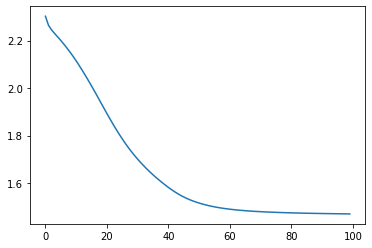

In [ ]:
plt.plot(losses)
plt.show()

In [ ]:
with torch.no_grad():
  model = model.to('cpu')
  y_pred = model(x_test)
  y_pred = y_pred.detach().numpy()
  predicted = np.argmax(y_pred, axis =1)
  accuracy = (accuracy_score(predicted, y_test))

In [ ]:
print(f'model의 output은 :  {y_pred[0]}')
print(f'argmax를 한 후의 output은 {predicted[0]}')
print(f'accuracy는 {accuracy}')

model의 output은 :  [4.59130388e-06 9.85431075e-01 5.63940592e-03 3.27340118e-03
 3.29295610e-04 1.17972144e-04 1.79119722e-03 2.89403158e-03
 6.88196305e-05 4.50304127e-04]
argmax를 한 후의 output은 1
accuracy는 0.9833333333333333


### 두번째 시도(layer 수정하기)

In [50]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(input, output, test_size = 0.3, random_state = 42,
                                                        stratify = data.target, shuffle = True)

x_train2 = torch.FloatTensor(x_train2).to(device)
y_train2 = torch.LongTensor(y_train2).to(device)
x_test2 = torch.FloatTensor(x_test2).to(device)
y_test2 = torch.LongTensor(y_test2).to(device)

In [51]:
class CustomDataset(Dataset):
  def __init__(self):
    self.x_data = x_train2
    self.y_data = [[y] for y in y_train2]

  def __len__(self):
    return len(self.x_data)

  def __getitem__(self, idx):
    x = torch.FloatTensor(self.x_data[idx]).to(device)
    y = torch.FloatTensor(self.y_data[idx]).to(device)
    return x, y

In [52]:
batch_size = 8

dataset = CustomDataset()
dataLoader = DataLoader(dataset, batch_size = batch_size)

In [53]:
model = nn.Sequential(
    nn.Linear(64, 32, bias = True),
    nn.Sigmoid(),
    nn.Linear(32, 16, bias = True),
    nn.Sigmoid(),
    nn.Linear(16, 10, bias = True),
    nn.Sigmoid()
).to(device)

In [54]:
class Model(torch.nn.Module):
  def __init__(self):
    super(Model, self).__init__()
    self.layer1 = nn.Sequential(
        nn.Linear(64, 32, bias = True),
        nn.Sigmoid(),
        nn.BatchNorm1d(32)
    )

    self.layer2 = nn.Sequential(
        nn.Linear(32, 16, bias = True),
        nn.Sigmoid()
    )

    self.layer3 = nn.Sequential(
        nn.Linear(16, 10),
        nn.Softmax()
    )

  def forward(self, x):
    output = self.layer1(x)
    output = self.layer2(output)
    output = self.layer3(output)
    return output

In [55]:
def init_weight(layer):
  if isinstance(layer, nn.Linear):
    torch.nn.init.xavier_uniform(layer.weight)
    layer.bias.data.fill_(0.01)

In [56]:
model = Model().to(device)
model.apply(init_weight)

<ipython-input-55-ad9d7f10013c>:3: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  torch.nn.init.xavier_uniform(layer.weight)


Model(
  (layer1): Sequential(
    (0): Linear(in_features=64, out_features=32, bias=True)
    (1): Sigmoid()
    (2): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (layer2): Sequential(
    (0): Linear(in_features=32, out_features=16, bias=True)
    (1): Sigmoid()
  )
  (layer3): Sequential(
    (0): Linear(in_features=16, out_features=10, bias=True)
    (1): Softmax(dim=None)
  )
)

In [57]:
loss_fn = nn.CrossEntropyLoss().to(device)

optimizer2 = optim.Adam(model.parameters(), lr = 0.01)

In [58]:
losses = []

for epoch in range(100):

  optimizer2.zero_grad()
  hypothesis = model(x_train2)

  cost = loss_fn(hypothesis, y_train2)
  cost.backward()
  optimizer2.step()
  losses.append(cost.item())

  if epoch % 10 == 0:
    print(epoch, cost.item())

/usr/local/lib/python3.8/dist-packages/torch/nn/modules/container.py:204: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


0 2.3044142723083496
10 2.13336443901062
20 1.986861228942871
30 1.8713005781173706
40 1.7774325609207153
50 1.6926785707473755
60 1.6341205835342407
70 1.5940989255905151
80 1.5476937294006348
90 1.5092843770980835


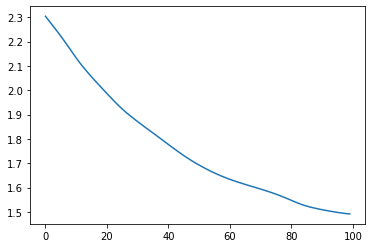

In [59]:
plt.plot(losses)
plt.show()
# loss함수 곡선이 더 부드러움

In [60]:
with torch.no_grad():
  model = model.to('cpu')
  y_pred = model(x_test2)
  y_pred = y_pred.detach().numpy()
  predicted = np.argmax(y_pred, axis = 1)
  accuracy = (accuracy_score(predicted, y_test2))

In [61]:
print(f'model의 output은 :  {y_pred[0]}')
print(f'argmax를 한 후의 output은 {predicted[0]}')
print(f'accuracy는 {accuracy}')

model의 output은 :  [1.6033628e-04 9.8208940e-01 1.8798397e-04 4.0326687e-03 2.8307445e-03
 1.2361985e-03 5.2358843e-03 6.4490183e-04 2.9608035e-03 6.2111783e-04]
argmax를 한 후의 output은 1
accuracy는 0.9592592592592593


### 3번 시도(layer, ReLU함수 쓰기)

In [72]:
x_train3, x_test3, y_train3, y_test3 = train_test_split(input, output, test_size = 0.3, stratify = data.target,
                                                        shuffle = True)

x_train3 = torch.FloatTensor(x_train3).to(device)
y_train3 = torch.LongTensor(y_train3).to(device)
x_test3 = torch.FloatTensor(x_test3)
y_test3 = torch.LongTensor(y_test3)

In [73]:
class CustomDataset(Dataset):
  def __init__(self):
    self.x_data = x_train3
    self.y_data = [[y] for y in y_train3]

  def __len__(self):
    return len(self.x_data)

  def __getitem__(self, idx):
    x = torch.FloatTensor(self.x_data[idx]).to(device)
    y = torch.FloatTensor(self.y_data[idx]).to(device)
    return x, y

In [74]:
batch_size = 8

dataset = CustomDataset()
dataLoader = DataLoader(dataset, batch_size = batch_size)

In [75]:
model = nn.Sequential(
    nn.Linear(64, 32, bias = True),
    nn.ReLU(),
    nn.Linear(32, 16, bias = True),
    nn.ReLU(),
    nn.Linear(16, 10, bias = True),
    nn.Softmax()
).to(device)


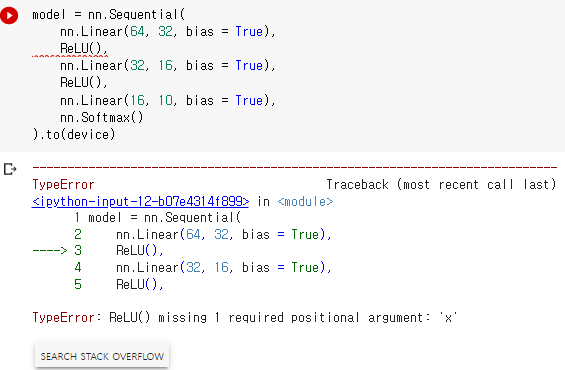

In [76]:
# 직접 구현한  ReLU 오류 발생해서 nn.ReLU사용

In [96]:
class Model(torch.nn.Module):
  def __init__(self):
    super(Model, self).__init__()
    
    self.layer1 = nn.Sequential(
        nn.Linear(64, 32, bias = True),
        nn.ReLU(),
        nn.BatchNorm1d(32)
    )
    
    self.layer2 = nn.Sequential(
        nn.Linear(32, 16, bias = True),
        nn.ReLU()
    )

    self.layer3 = nn.Sequential(
        nn.Linear(16, 10, bias = True),
        nn.Softmax()
    )

  def forward(self, x):
    output = self.layer1(x)
    output = self.layer2(output)
    output = self.layer3(output)
    return output

In [97]:
def init_weight(layer):
  if isinstance(layer, nn.Linear):
    torch.nn.init.xavier_uniform(layer.weight)
    layer.bias.data.fill_(0.01)

In [98]:
model = Model().to(device)
model.apply(init_weight)

<ipython-input-97-ad9d7f10013c>:3: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  torch.nn.init.xavier_uniform(layer.weight)


Model(
  (layer1): Sequential(
    (0): Linear(in_features=64, out_features=32, bias=True)
    (1): ReLU()
    (2): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (layer2): Sequential(
    (0): Linear(in_features=32, out_features=16, bias=True)
    (1): ReLU()
  )
  (layer3): Sequential(
    (0): Linear(in_features=16, out_features=10, bias=True)
    (1): Softmax(dim=None)
  )
)

In [99]:
loss_fn = nn.CrossEntropyLoss().to(device)

optimizer3 = optim.Adam(model.parameters(), lr = 0.01)

In [100]:
losses = []

for epoch in range(100):

  optimizer3.zero_grad()
  hypothesis = model(x_train3)

  cost = loss_fn(hypothesis, y_train3)
  cost.backward()
  optimizer3.step()
  losses.append(cost.item())

  if epoch % 10 == 0:
    print(epoch, cost.item())

/usr/local/lib/python3.8/dist-packages/torch/nn/modules/container.py:204: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


0 2.305945873260498
10 1.8244860172271729
20 1.6256773471832275
30 1.562050700187683
40 1.5024161338806152
50 1.4836009740829468
60 1.476760983467102
70 1.474096417427063
80 1.4731695652008057
90 1.4718658924102783


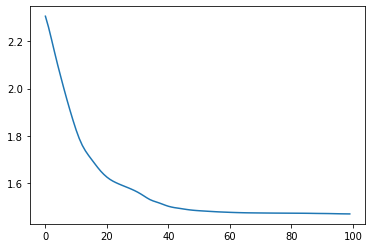

In [101]:
plt.plot(losses)
plt.show()

In [102]:
with torch.no_grad():
  model = model.to('cpu')
  y_pred = model(x_test3)
  y_pred = y_pred.detach().numpy()
  predicted = np.argmax(y_pred, axis = 1)
  accuracy = (accuracy_score(predicted, y_test3))

In [103]:
print(f'model의 output은 :  {y_pred[0]}')
print(f'argmax를 한 후의 output은 {predicted[0]}')
print(f'accuracy는 {accuracy}')

model의 output은 :  [2.5955407e-08 9.9857306e-01 1.3807225e-09 3.3966728e-07 1.6101163e-06
 4.7314636e-04 2.1216939e-08 2.6217320e-08 3.6878591e-05 9.1484148e-04]
argmax를 한 후의 output은 1
accuracy는 0.9703703703703703


### 4번째 시도(ReLU만 사용)

In [104]:
x_train4, x_test4, y_train4, y_test4 = train_test_split(input, output, test_size = 0.3, stratify = data.target,
                                                        shuffle = True)

In [105]:
x_train = torch.FloatTensor(x_train4).to(device)
y_train = torch.LongTensor(y_train4).to(device)
x_test = torch.FloatTensor(x_test4)
y_test = torch.LongTensor(y_test4)

In [106]:
class CustomDataset(Dataset):
  def __init__(self):
    self.x_data = x_train
    self.y_data = [[y] for y in y_train]

  def __len__(self):
    return len(self.x_data)

  def __getitem__(self, idx):
    x = torch.FloatTensor(self.x_data[idx]).to(device)
    y = torch.FloatTensor(self.y_data[idx]).to(device)
    return x, y

In [107]:
batch_size = 8

dataset = CustomDataset()
dataloader = DataLoader(dataset, batch_size = batch_size)

In [108]:
model = nn.Sequential(
    nn.Linear(64, 398, bias = True),
    nn.ReLU(),
    nn.Linear(398, 40, bias = True),
    nn.ReLU(),
    nn.Linear(40, 20, bias = True),
    nn.ReLU(),
    nn.Linear(20, 10, bias = True),
    nn.Softmax()
    )

In [109]:
class Model(nn.Module):
  def __init__(self):
    super(Model, self).__init__()
    
    self.layer1 = nn.Sequential(
        nn.Linear(64, 398, bias = True),
        nn.ReLU(),
        nn.BatchNorm1d(398)
        )
    
    self.layer2 = nn.Sequential(
        nn.Linear(398, 40, bias = True),
        nn.ReLU()
    )

    self.layer3 = nn.Sequential(
        nn.Linear(40, 20, bias = True),
        nn.ReLU()
    )
    
    self.layer4 = nn.Sequential(
        nn.Linear(20, 10, bias = True),
        nn.Softmax()
    )

  def forward(self, x):
    output = self.layer1(x)
    output = self.layer2(output)
    output = self.layer3(output)
    output = self.layer4(output)
    return output

In [110]:
def init_weight(layer):
  if isinstance(layer, nn.Linear):
    torch.nn.init.xavier_uniform(layer.weight)
    layer.bias.data.fill_(0.01)

In [111]:
model = Model().to(device)
model.apply(init_weight)

<ipython-input-110-ad9d7f10013c>:3: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  torch.nn.init.xavier_uniform(layer.weight)


Model(
  (layer1): Sequential(
    (0): Linear(in_features=64, out_features=398, bias=True)
    (1): ReLU()
    (2): BatchNorm1d(398, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (layer2): Sequential(
    (0): Linear(in_features=398, out_features=40, bias=True)
    (1): ReLU()
  )
  (layer3): Sequential(
    (0): Linear(in_features=40, out_features=20, bias=True)
    (1): ReLU()
  )
  (layer4): Sequential(
    (0): Linear(in_features=20, out_features=10, bias=True)
    (1): Softmax(dim=None)
  )
)

In [112]:
loss_fn = nn.CrossEntropyLoss().to(device)

optimizer4 = optim.Adam(model.parameters(), lr = 0.01)

In [113]:
losses = []

for epoch in range(100):

  optimizer4.zero_grad()
  hypothesis = model(x_train)
  cost = loss_fn(hypothesis, y_train)
  cost.backward()
  optimizer4.step()
  losses.append(cost.item())

  if epoch % 10 == 0:
    print(epoch, cost.item())

/usr/local/lib/python3.8/dist-packages/torch/nn/modules/container.py:204: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


0 2.3124771118164062
10 1.5068608522415161
20 1.476772427558899
30 1.4665262699127197
40 1.4651814699172974
50 1.4640038013458252
60 1.4634960889816284
70 1.4634603261947632
80 1.4634519815444946
90 1.4634226560592651


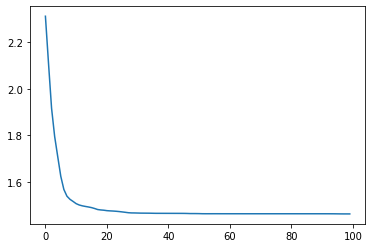

In [114]:
plt.plot(losses)
plt.show()

In [115]:
with torch.no_grad():
  model = model.to('cpu')
  y_pred = model(x_test)
  y_pred = y_pred.detach().numpy()
  predicted = np.argmax(y_pred, axis = 1)
  accuracy = (accuracy_score(predicted, y_test))

In [116]:
print(f'model의 output은 :  {y_pred[0]}')
print(f'argmax를 한 후의 output은 {predicted[0]}')
print(f'accuracy는 {accuracy}')

model의 output은 :  [1.00000000e+00 2.86235479e-20 3.65332157e-12 1.29349076e-20
 1.63440374e-18 1.04791634e-20 2.08505576e-13 4.91669140e-23
 2.38489025e-13 1.62222554e-15]
argmax를 한 후의 output은 0
accuracy는 0.9592592592592593


### 5번째 시도(layer, ReLU및 lr수정)

In [118]:
x_train5, x_test5, y_train5, y_test5 = train_test_split(input, output, stratify = data.target,
                                                         random_state = 42)

x_train5 = torch.FloatTensor(x_train5).to(device)
y_train5 = torch.FloatTensor(y_train5).to(device)
x_test5 = torch.LongTensor(x_test5).to(device)
y_test5 = torch.LongTensor(y_test5).to(device)

In [121]:
class CustomDataset(Dataset):
  def __init__(self):
    self.x_data = x_train5
    self.y_data = [[y] for y in y_train]

  def __len(self):
    return len(self.x_data)

  def __getitem__(self, idx):
    x = torch.FloatTensor(self.x_data[idx]).to(device)
    y = torch.FloatTensor(self.y_data[idx]).to(device)
    return x, y

In [123]:
batch_size = 8

dataset = CustomDataset()
dataloader = DataLoader(dataset, batch_size = batch_size)

In [125]:
model = nn.Sequential(
    nn.Linear(64, 32),
    nn.ReLU(),
    nn.Linear(32, 16),
    nn.ReLU(),
    nn.Linear(16, 10),
    nn.Softmax()
).to(device)

In [127]:
class Model(nn.Module):
  def __init__(self):
    super(Model, self).__init__()

    self.layer1 = nn.Sequential(
        nn.Linear(64, 32),
        nn.ReLU(),
        nn.BatchNorm1d(32)
    )

    self.layer2 = nn.Sequential(
        nn.Linear(32, 16),
        nn.ReLU()
    )

    self.layer3 = nn.Sequential(
        nn.Linear(16, 10),
        nn.Softmax()
    )

  def forward(self, x):
    output = self.layer1(x)
    output = self.layer2(output)
    output = self.layer3(output)
    return output

In [ ]:
def init_weights(layer):
    if isinstance(layer, nn.Linear):
        torch.nn.init.xavier_uniform(layer.weight)
        layer.bias.data.fill_(0.01)


In [128]:
model = Model().to(device)
model.apply(init_weight)

<ipython-input-110-ad9d7f10013c>:3: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  torch.nn.init.xavier_uniform(layer.weight)


Model(
  (layer1): Sequential(
    (0): Linear(in_features=64, out_features=32, bias=True)
    (1): ReLU()
    (2): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (layer2): Sequential(
    (0): Linear(in_features=32, out_features=16, bias=True)
    (1): ReLU()
  )
  (layer3): Sequential(
    (0): Linear(in_features=16, out_features=10, bias=True)
    (1): Softmax(dim=None)
  )
)

In [129]:
loss_fn  = nn.CrossEntropyLoss().to(device)

optimizer = optim.Adam(model.parameters(), lr= 0.03)


In [130]:
losses = []
for epoch in range(100):

  optimizer.zero_grad()
  hypothesis = model(x_train)

  # 비용 함수
  cost = loss_fn(hypothesis, y_train)
  cost.backward()
  optimizer.step()
  losses.append(cost.item())

  if epoch % 10 == 0:
    print(epoch, cost.item())

/usr/local/lib/python3.8/dist-packages/torch/nn/modules/container.py:204: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


0 2.3116815090179443
10 1.6555867195129395
20 1.5181865692138672
30 1.4785375595092773
40 1.470747470855713
50 1.4678915739059448
60 1.4661439657211304
70 1.465245246887207
80 1.4651446342468262
90 1.4643148183822632


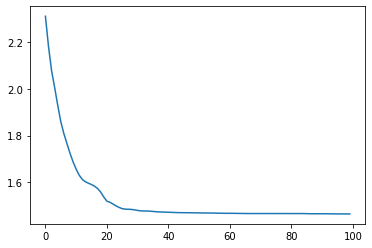

In [131]:
plt.plot(losses)
plt.show()

In [132]:
with torch.no_grad():
  model = model.to('cpu')
  y_pred = model(x_test)
  y_pred = y_pred.detach().numpy()
  predicted = np.argmax(y_pred, axis =1)
  accuracy = (accuracy_score(predicted, y_test))

In [133]:
print(f'model의 output은 :  {y_pred[0]}')
print(f'argmax를 한 후의 output은 {predicted[0]}')
print(f'accuracy는 {accuracy}')

model의 output은 :  [9.9999976e-01 7.6478638e-17 4.2761522e-20 3.9924590e-14 4.7461324e-09
 3.1968150e-11 4.1517803e-09 9.8357549e-18 2.9492099e-07 1.1116442e-08]
argmax를 한 후의 output은 0
accuracy는 0.9685185185185186


# < 3주차 과제 2 : CNN 맛보기>

In [ ]:
from __future__ import print_function  # 어떤 버전을 사용하더라도 파이썬 3 print를 사용
import argparse
# import 파이썬 스크립트를 개발할 때, 호출 당시 인자값을 줘서 동작을 다르게 하고 싶은 경우가 있음
# 이때, 파이썬 내장함수인 argparse 모듈을 사용하여 원하는 기능을 개발할 수 있음
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable

In [ ]:
# Training settings

batch_size = 64

# MNIST Dataset
train_dataset = datasets.MNIST(root='./data/',
                               train=True,
                               transform=transforms.ToTensor(),
                               download=True)

test_dataset = datasets.MNIST(root='./data/',
                              train=False,
                              transform=transforms.ToTensor())

# Data Loader (Input Pipeline)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [ ]:
class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()
    self.conv1 = nn.Conv2d(1, 10, kernel_size = 5)
    self.conv2 = nn.Conv2d(10, 20, kernel_size = 5)
    self.mp = nn.MaxPool2d(2)
    self.fc = nn.Linear(320, 10) ### : 알맞는 input은?
    # 123으로 초기 설정하면 mat1 and mat2 shapes cannot be multiplied (64x320 and 123x10)이라는 오류 발생
    # 따라서 320으로 설정

  def forward(self, x):
    in_size = x.size(0)
    x = F.relu(self.mp(self.conv1(x)))
    x = F.relu(self.mp(self.conv2(x)))
    x = x.view(in_size, -1)
    x = self.fc(x)
    return F.log_softmax(x)

In [ ]:
model = Net()
optimizer = optim.SGD(model.parameters(), lr = 0.01, momentum = 0.5)

In [ ]:
def train(epoch):
  model.train() # layer들을 training mode로 바꿔줌
  # ex) batch normalization layer에서는 batch statistics를 이용하고
  # ex) dropout layer가 주어진 확률에 따라 활성화
  for batch_idx, (data, target) in enumerate(train_loader):
    data, target = Variable(data), Variable(target)
    # Variable에 대해
    # 현재는 Tensor 타입과 병합되었다고 한다. 즉, Tensor 타입에서 디폴트로 autograd 기능을 지원하도록 되어있다.
    # PyTorch 0.4 이상 버전에서는 더이상 Variable을 사용할 필요가 없다. 
    # Legacy 코드에 Variable이 있다면 그냥 Tensor라고 생각하고 읽으면 된다.
    
    optimizer.zero_grad()
    output = model(data)
    loss = F.nll_loss(output, target)
    loss.backward()
    optimizer.step()
    if batch_idx % 10 == 0:
      print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
          epoch, batch_idx * len(data), len(train_loader.dataset),
          100. * batch_idx / len(train_loader), loss.item()))

In [ ]:
def test():
    model.eval() #model.eval() 의 기능은? : 
    # eval은 evaluation 과정에서 사용하지 않아야 하는 layer들을 알아서 off 시키도록 하는 함수
    # layer들을 evaluation mode로 바꿔줌
    # ex) dropout layer는 비활성화
    # model.eval = model.train(False)

    test_loss = 0
    correct = 0
    for data, target in test_loader:
        data, target = Variable(data, volatile=True), Variable(target)
        # volatile=True 옵션은 backprop은 하지 않고 forward prop만 할 때 사용
        # forward prop을 하면서 지나간 모든 layer들에 있는 activation 값들을 따로 저장하지 않음.
        
        output = model(data)
        test_loss += F.nll_loss(output, target, size_average=False).data # nll_loss?? / cross entropy loss와의 관계 확인!
        # CrossEntropyLoss 에서는 LogSoftmax 를 적용한 후 Negative Log-likelihood(NLL) Loss를 적용
        # NLLLoss 안에서는 softmax나 log함수가 이뤄지지 않습니다. 
        # 그래서 모델 output(raw data)을 input으로 그대로 사용하는 것이 아니라 LogSoftmax 함수를 적용한 후 input으로 사용
        pred = output.data.max(1, keepdim=True)[1]
        correct += pred.eq(target.data.view_as(pred)).cpu().sum()
        # torch.eq -> 같으면 True, 다르면 False

    test_loss /= len(test_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

In [ ]:
for epoch in range(1, 10):
    train(epoch)
    test()

<ipython-input-51-5ee9f2c94ea9>:17: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Train Epoch: 1 [0/60000 (0%)]	Loss: 2.285802
Train Epoch: 1 [640/60000 (1%)]	Loss: 2.297466
Train Epoch: 1 [1280/60000 (2%)]	Loss: 2.271355
Train Epoch: 1 [1920/60000 (3%)]	Loss: 2.270036
Train Epoch: 1 [2560/60000 (4%)]	Loss: 2.262640
Train Epoch: 1 [3200/60000 (5%)]	Loss: 2.234005
Train Epoch: 1 [3840/60000 (6%)]	Loss: 2.203182
Train Epoch: 1 [4480/60000 (7%)]	Loss: 2.159316
Train Epoch: 1 [5120/60000 (9%)]	Loss: 2.116415
Train Epoch: 1 [5760/60000 (10%)]	Loss: 2.065259
Train Epoch: 1 [6400/60000 (11%)]	Loss: 2.022405
Train Epoch: 1 [7040/60000 (12%)]	Loss: 1.843505
Train Epoch: 1 [7680/60000 (13%)]	Loss: 1.605751
Train Epoch: 1 [8320/60000 (14%)]	Loss: 1.439020
Train Epoch: 1 [8960/60000 (15%)]	Loss: 1.052423
Train Epoch: 1 [9600/60000 (16%)]	Loss: 0.925142
Train Epoch: 1 [10240/60000 (17%)]	Loss: 0.791331
Train Epoch: 1 [10880/60000 (18%)]	Loss: 0.833732
Train Epoch: 1 [11520/60000 (19%)]	Loss: 0.673839
Train Epoch: 1 [12160/60000 (20%)]	Loss: 0.432406
Train Epoch: 1 [12800/60000 (

<ipython-input-54-e1e3567ce661>:11: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  data, target = Variable(data, volatile=True), Variable(target)
/usr/local/lib/python3.8/dist-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))



Test set: Average loss: 0.1769, Accuracy: 9464/10000 (95%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 0.186733
Train Epoch: 2 [640/60000 (1%)]	Loss: 0.095128
Train Epoch: 2 [1280/60000 (2%)]	Loss: 0.080813
Train Epoch: 2 [1920/60000 (3%)]	Loss: 0.049497
Train Epoch: 2 [2560/60000 (4%)]	Loss: 0.178470
Train Epoch: 2 [3200/60000 (5%)]	Loss: 0.311309
Train Epoch: 2 [3840/60000 (6%)]	Loss: 0.121184
Train Epoch: 2 [4480/60000 (7%)]	Loss: 0.398396
Train Epoch: 2 [5120/60000 (9%)]	Loss: 0.294877
Train Epoch: 2 [5760/60000 (10%)]	Loss: 0.291725
Train Epoch: 2 [6400/60000 (11%)]	Loss: 0.182255
Train Epoch: 2 [7040/60000 (12%)]	Loss: 0.217493
Train Epoch: 2 [7680/60000 (13%)]	Loss: 0.265823
Train Epoch: 2 [8320/60000 (14%)]	Loss: 0.200416
Train Epoch: 2 [8960/60000 (15%)]	Loss: 0.123568
Train Epoch: 2 [9600/60000 (16%)]	Loss: 0.171012
Train Epoch: 2 [10240/60000 (17%)]	Loss: 0.041239
Train Epoch: 2 [10880/60000 (18%)]	Loss: 0.043066
Train Epoch: 2 [11520/60000 (19%)]	Loss: 0.234413
Train Epoch: 2 [12